# _Python for Scientific Data Analysis_

# SciPy



## Section 1: Optimization in SciPy (Continued)


We have already discussed some of its linear algebra capabilities in the previous lectures, so we are going to switch gears slightly, first discussing its optimization capabilities.


The _optimization_ subpackage within Scipy can be accessed by ``from scipy import optimize``.   Nearly always you want to do array operations when setting up an optimization problem, in which case, you need to load NumPy as well.  So the typically preliminary steps for a SciPy optimization problem are to do the following at the beginning of your script:

```
import numpy as np
from scipy import optimize
```

In [1]:
import numpy as np
from scipy import optimize

Now, this solution obviously works (residuals are at machine precision level).  But be careful.  What if you had set the initial guess to be a bit different?

### 3. Curve Fitting (with SciPy *and* NumPy)

The SciPy provides a ``curve_fit`` function in its optimization library to fit the data with a given function. This method applies non-linear least squares to fit the data and extract the optimal parameters out of it.  The standard algorithm used with ``curve_fit`` is the Levenberg-Marquardt algorithm.

 NumPy also provides fitting capabilities through the ``np.polyfit`` function (I'm more familiar with this) and ``np.polynomial`` function (newer version, which is 'preferred' but I don't like it).  

The major difference between these two is that ``curve_fit`` requires you to supply a functional fit; ``np.polyfit`` is just that (a polynomial of some specified degree where you solve for the coefficients).  In this sense, I guess that ``curve_fit`` is more powerful.  


We will demonstrate a simple polynomial fit to data using both libraries then a more complex one fitting a functional form with SciPy.

First, the simple case

[0.94297098 0.67308572]
[0.94297098 0.67308572]


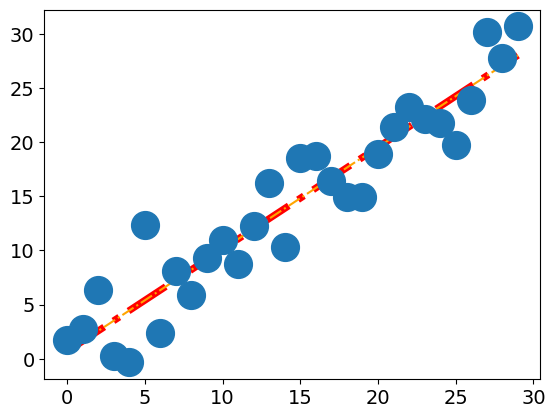

In [2]:
import numpy as np
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

xarray=np.arange(30)
yarray=np.arange(30)+3*np.random.randn(30) 

#numpy
result=np.polyfit(xarray,yarray,1)
print(result)


#scipy
def func(x,a,b):
 return a*x+b

param, param_cov = curve_fit(func, xarray, yarray)
print(param)


#the fit with SciPy
plt.plot(xarray,func(xarray,param[0],param[1]),'-.',color='red',linewidth=5) 
#or with NumPy
plt.plot(xarray,result[0]*xarray+result[1],'-.',color='orange') #basically the same as SciPy
plt.plot(xarray, yarray, 'o', color ='tab:blue',markersize=20) #the data
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)

plt.show()

Obviously, we just had a simple linear plot with some noise added and not surprisingly that is what both NumPy and SciPy found.

Here's one that is more complex, and where we need SciPy to do the work  


[2.77067774 3.77314837]


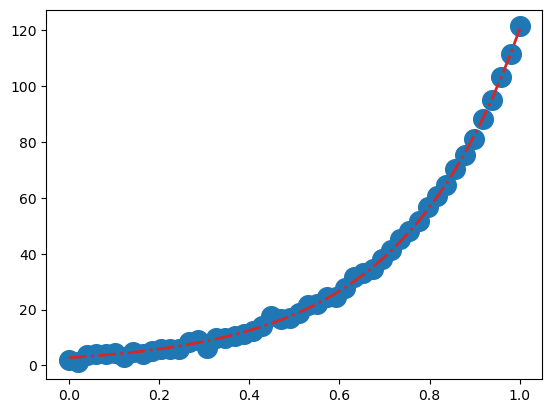

In [3]:
#generate fake data
xarray = np.linspace(0, 1, num = 50)
yarray = 2.7 * np.exp(3.8 * xarray) + np.random.normal(size = 50) #some exponential with noise

def test(xarray, a, b):
    return a*np.exp(b*xarray)

param,param_cov = curve_fit(test,xarray,yarray)

print(param)

plt.plot(xarray,test(xarray,param[0],param[1]),'-.',color='tab:red',linewidth=2)
plt.scatter(xarray,yarray,s=200)
plt.show()

Note here that the assumed functional form is key.  For example, if you are going to model your data as a simple cosine function then the function you port into ``curve_fit`` should look like:

```
def test(xarray, a, b):
    return a*np.cos(b*x) 
```

### Optimization Problems with Initial Guesses 

What about the following case?  Let's see what happens when we try to fit it blindly with ``curve_fit``

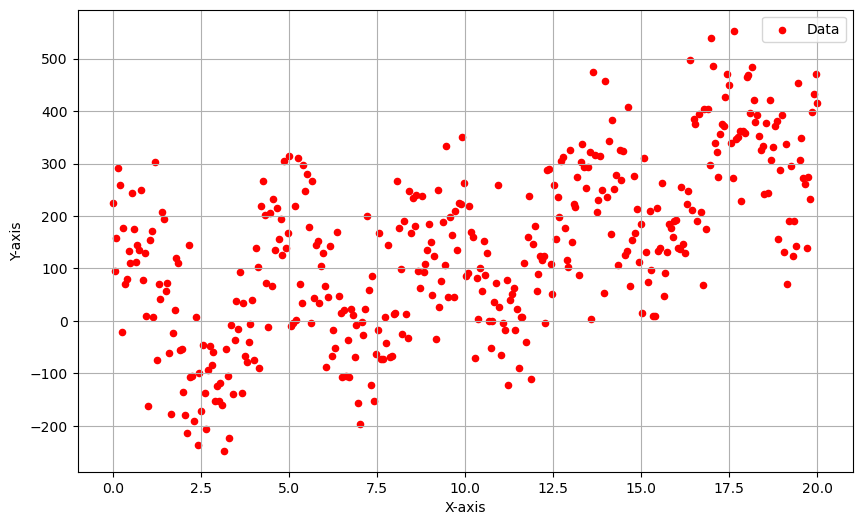

In [4]:
noisydata=np.loadtxt('./files/noisycompfunc.txt')
xnoise=noisydata[:,0]
ynoise=noisydata[:,1]


#First, plot the data to see what we are up against

plt.figure(figsize=(10, 6))
plt.scatter(xnoise, ynoise, label='Data', color='red', marker='o', s=20)
#plt.plot(x, y_fit, label='Fitted Curve', color='blue', linewidth=2)
#plt.plot(x, y_true, label='True Curve', color='tab:green', linewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
#plt.title('Levenberg-Marquardt Fit: Polynomial + Sinusoidal Model')
plt.legend()
plt.grid()
plt.show()

Looks like a sinusoid and maybe a quadratic  function?

Fitted parameters: a = 1.100211371784722, b = -4.948188054563571, c = 39.184757832414995, d = -3.2684984123327956, frequency = -4.097204341841318, phase = 86.93715910105202


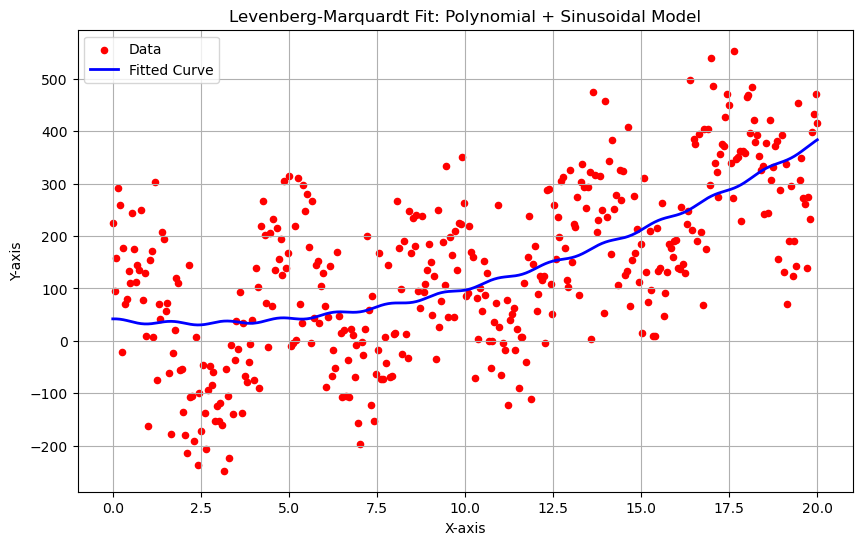

In [5]:
# Define model function
def complex_model(x, a, b, c, d, frequency, phase):
    return (a * x**2 + b * x + c) + (d * np.sin(frequency * x + phase))

# Initial guesses for parameters
#initial_guess = [.25, 0.5, 0, 5, 1.5, 0.5]  # [a, b, c, d, frequency, phase]
#initial_guess = [1, 0, 0, 1, 1, 0]

# Fit the model to the data using curve_fit (Levenberg-Marquardt)
#params, covariance = curve_fit(complex_model, x, y, p0=initial_guess)
params, covariance = curve_fit(complex_model, xnoise, ynoise)

# Extract fitted parameters
a, b, c, d, frequency, phase = params
print(f"Fitted parameters: a = {a}, b = {b}, c = {c}, d = {d}, frequency = {frequency}, phase = {phase}")

# Generate fitted data for plotting
y_fit = complex_model(xnoise, *params)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(xnoise, ynoise, label='Data', color='red', marker='o', s=20)
plt.plot(xnoise, y_fit, label='Fitted Curve', color='blue', linewidth=2)
#plt.plot(x, y_true, label='True Curve', color='tab:green', linewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Levenberg-Marquardt Fit: Polynomial + Sinusoidal Model')
plt.legend()
plt.grid()
plt.show()

Okay, this obviously didn't work.  That is because ``curve_fit `` needs a starting initial guess for parameters.

The initial guess in ``scipy.optimize.curve_fit`` is specified by the p0 argument.  I.e.

```

param,cov=curve_fit(model,x,y,p0=initial_guess)
```

``p0`` provides the starting point for the optimization algorithm used to find the best-fit parameters for a given model function and data. While curve_fit can sometimes converge to a reasonable solution without an explicit p0, providing a good initial guess is often crucial for several reasons:

* Convergence to the Global Minimum:
    Nonlinear optimization problems can have multiple local minima. A well-chosen initial guess guides the algorithm towards the global minimum, which represents the true best fit, rather than getting stuck in a suboptimal local minimum.
* Algorithm Efficiency and Speed:
    Starting closer to the optimal solution reduces the number of iterations required for the algorithm to converge, leading to faster computation times.
* Handling Complex Models:
    For models with many parameters or complex functional forms, a poor initial guess can lead to non-convergence or convergence to physically implausible parameter values.

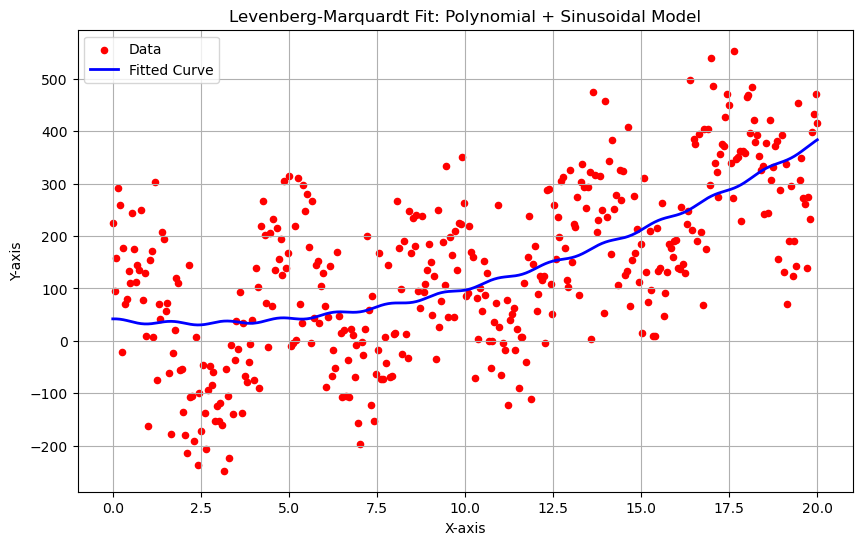

In [6]:
# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(xnoise, ynoise, label='Data', color='red', marker='o', s=20)
plt.plot(xnoise, y_fit, label='Fitted Curve', color='blue', linewidth=2)
#plt.plot(x, y_true, label='True Curve', color='tab:green', linewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Levenberg-Marquardt Fit: Polynomial + Sinusoidal Model')
plt.legend()
plt.grid()
plt.show()

We have two clues: 1 ) the spacing between peaks (i.e. the period) looks like around (9-5) or 4.  So then the frequency should be 2*``np.pi``/4

We have two clues: 1 ) the spacing between peaks (i.e. the period) looks like around (9-5) or 4.  So then the frequency should be 2*``np.pi``/4, or about 1.6.   Also the amplitude of the peak looks like it is around 100 to 150 or so.  So let's set some initial guesses ...

Fitted parameters: a = 1.0098134167046475, b = -1.5880148276945862, c = 16.104854188616613, d = 108.926921958886, frequency = 1.487656450547496, phase = 0.5266955973970683


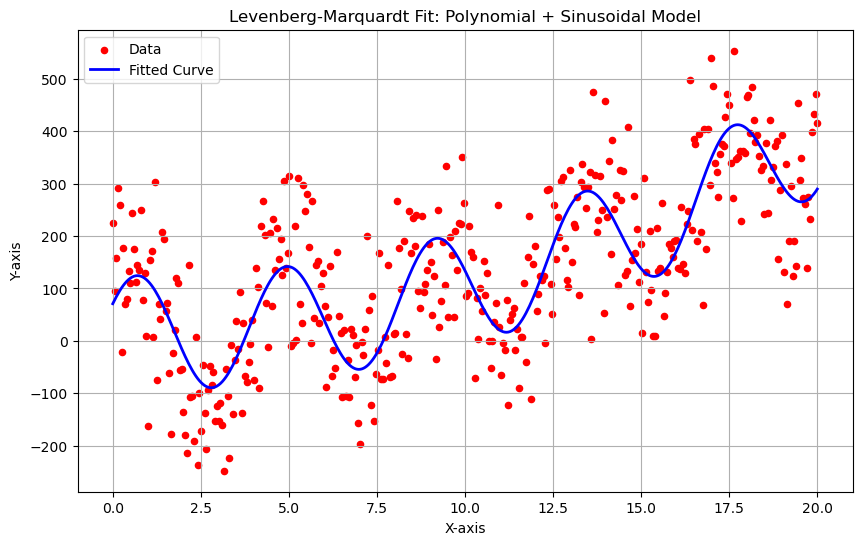

In [7]:
# Define model function
def complex_model(x, a, b, c, d, frequency, phase):
    return (a * x**2 + b * x + c) + (d * np.sin(frequency * x + phase))

# Initial guesses for parameters
initial_guess = [1, 1, 1, 125,1.5,0]  # [a, b, c, d, frequency, phase]


# Fit the model to the data using curve_fit (Levenberg-Marquardt)
params, covariance = curve_fit(complex_model, xnoise, ynoise, p0=initial_guess)
#params, covariance = curve_fit(complex_model, xnoise, ynoise)

# Extract fitted parameters
a, b, c, d, frequency, phase = params
print(f"Fitted parameters: a = {a}, b = {b}, c = {c}, d = {d}, frequency = {frequency}, phase = {phase}")

# Generate fitted data for plotting
y_fit = complex_model(xnoise, *params)

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(xnoise, ynoise, label='Data', color='red', marker='o', s=20)
plt.plot(xnoise, y_fit, label='Fitted Curve', color='blue', linewidth=2)
#plt.plot(x, y_true, label='True Curve', color='tab:green', linewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Levenberg-Marquardt Fit: Polynomial + Sinusoidal Model')
plt.legend()
plt.grid()
plt.show()

Much better. In fact it is 'that' far from the true values, compared below ...

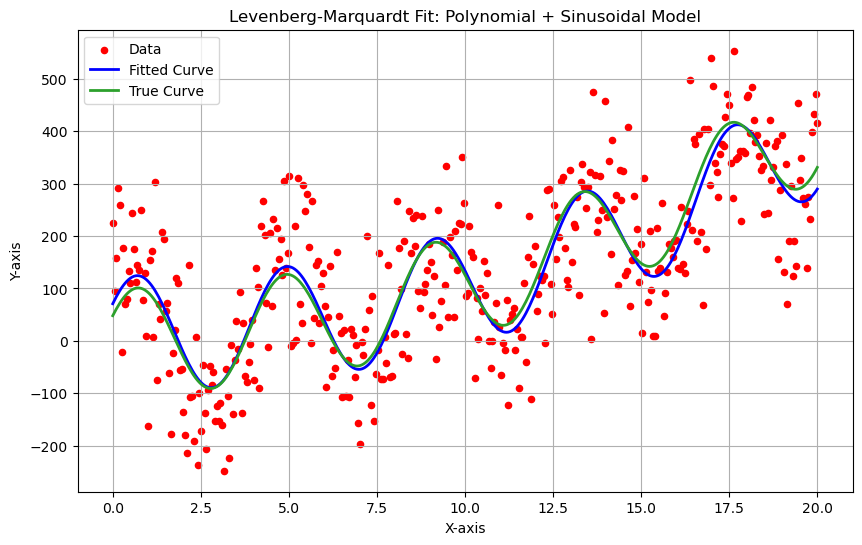

In [8]:
# True parameters for the model
true_a = 1.0
true_b = 0.5
true_c = 0.1
true_d = 100.0
true_frequency = 1.5
true_phase = 0.5

# Generate y values using a polynomial + sine function
y_true = (true_a * xnoise**2 + true_b * xnoise + true_c) + \
    (true_d * np.sin(true_frequency * xnoise + true_phase))

# Plot the original data and the fitted curve
plt.figure(figsize=(10, 6))
plt.scatter(xnoise, ynoise, label='Data', color='red', marker='o', s=20)
plt.plot(xnoise, y_fit, label='Fitted Curve', color='blue', linewidth=2)
plt.plot(xnoise, y_true, label='True Curve', color='tab:green', linewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Levenberg-Marquardt Fit: Polynomial + Sinusoidal Model')
plt.legend()
plt.grid()
plt.show()

### Curve Fitting with Errors

e.g. ...

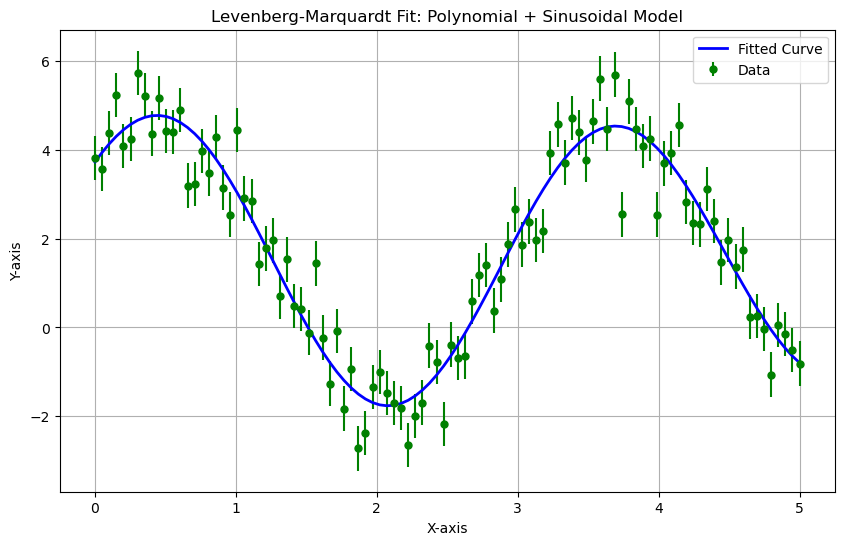

In [9]:
import numpy as np
from scipy.stats import norm

# Set random seed for reproducibility
np.random.seed(42)

# Define the model: sine + quadratic
#def model(x, A, freq, phase, a, b, c):
def model(x, A, freq, phase, a, b, c):
    """
    Model: y = A * sin(omega * x + phi) + a * x^2 + b * x + c
    """
    return A * np.sin(freq * x + phase) + a * x**2 + b * x + c



# True parameters for generating synthetic data
true_params = [3.0, 2.0, 0.5, 0.1, -0.5, 2.0]  # [A, omega, phi, a, b, c]
true_sigma = 0.5  # Standard deviation of noise

# Generate synthetic data
n_points = 100
x_data = np.linspace(0, 5, n_points)

y_true = model(x_data, *true_params) #this will unpack the list true_params ... dont' worry about this for now
 
y_data = y_true + 1.5*np.random.normal(0, true_sigma, n_points)


#pars, covariance = curve_fit(model, x_data, y_data)
pars, covariance = curve_fit(model, x_data, y_data,sigma=true_sigma)

# Generate fitted data for plotting
y_fit = model(x_data, *pars)
plt.figure(figsize=(10, 6))
plt.errorbar(x_data, y_data, yerr=true_sigma,label='Data', ls='none',color='green', marker='o', ms=5)
plt.plot(x_data, y_fit, label='Fitted Curve', color='blue', linewidth=2)
#plt.plot(xnoise, y_true, label='True Curve', color='tab:green', linewidth=2)
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.title('Levenberg-Marquardt Fit: Polynomial + Sinusoidal Model')
plt.legend()
plt.grid()
plt.show()

## Maximum Likelihood Fits Using SciPy

The least squares solution found in by ``curve_fit`` is really the "maximum likelihood result" for a model where the error bars are assumed correct, Gaussian and independent.  This is often not the case.  A more generally, robust approach is to write down the "likelihood function" and optimise _this_ .

To test if a set of data is likely for a particular model, we would then determine the likelihood of each data point, and
multiply each of these individual likelihoods to determine an overall likelihood. The most probable model would maximize this likelihood, hence _maximum likelihood_.

We will get to this more when we talk about MCMC late in the course.  But for now the important thing is to focus on the functional form of the likelihood function, er the _log-likelihood_ (here's an example for normally distributed data):


$$ln(\mathcal{L}(y|x,model))= -\frac{1}{2} (\sum_{i = 1}^{n}{\left(\frac{y_{i}-model}{\sigma_i}\right)^{2} + ln(2\pi\,\sigma_n^2)) }$$

Let's do one demonstration ... 

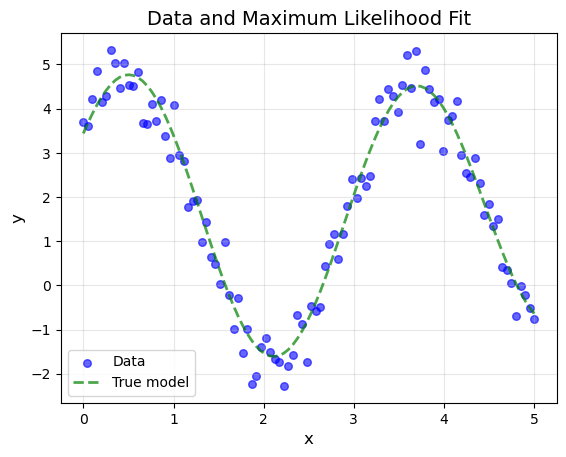

In [20]:
# Set random seed for reproducibility
np.random.seed(42)

# Define the model: sine + quadratic
def model(x, params):
    """
    Model: y = A * sin(omega * x + phi) + a * x^2 + b * x + c
    params = [A, omega, phi, a, b, c]
    """
    A, omega, phi, a, b, c = params
    return A * np.sin(omega * x + phi) + a * x**2 + b * x + c

# True parameters for generating synthetic data
true_params = [3.0, 2.0, 0.5, 0.1, -0.5, 2.0]  # [A, omega, phi, a, b, c]
true_sigma = 0.5  # Standard deviation of noise

# Generate synthetic data
n_points = 100
x_data = np.linspace(0, 5, n_points)
y_true = model(x_data, true_params)
y_data = y_true + np.random.normal(0, true_sigma, n_points)

fig,ax1=plt.subplots()
ax1.scatter(x_data, y_data, alpha=0.6, s=30, label='Data', color='blue')
ax1.plot(x_data, y_true, 'g--', linewidth=2, label='True model', alpha=0.7)
#ax1.plot(x_fine, y_fitted, 'r-', linewidth=2, label='Fitted model')
#ax1.fill_between(x_fine, y_fitted - fitted_sigma, y_fitted + fitted_sigma, 
#                  alpha=0.2, color='red', label=f'±1σ ({fitted_sigma:.3f})')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Data and Maximum Likelihood Fit', fontsize=14)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

In [21]:
# Define negative log-likelihood function
def negative_log_likelihood(params, x, y):
    """
    Negative log-likelihood assuming Gaussian errors.
    params = [A, omega, phi, a, b, c, sigma]
    """
    # Extract model parameters and noise standard deviation
    model_params = params[:-1]
    sigma = params[-1]
    
    # Prevent sigma from being negative or too small
    if sigma <= 0:
        return 1e10
    
    # Calculate model predictions
    y_pred = model(x, model_params)
    
    # Calculate negative log-likelihood
    # For Gaussian errors: -log(L) = n/2 * log(2*pi) + n*log(sigma) + sum((y - y_pred)^2) / (2*sigma^2)
    n = len(y)
    nll = n * np.log(sigma) + np.sum((y - y_pred)**2) / (2 * sigma**2)
    
    return nll

In [22]:
# Initial guess for parameters
initial_params = [2.5, 1.8, 0.3, 0.05, -0.3, 1.5, 0.6]  # [A, omega, phi, a, b, c, sigma]

# Perform maximum likelihood estimation
result = minimize(negative_log_likelihood, initial_params, 
                 args=(x_data, y_data), 
                 method='Nelder-Mead',
                 options={'maxiter': 10000})

# Extract fitted parameters
fitted_params = result.x
fitted_model_params = fitted_params[:-1]
fitted_sigma = fitted_params[-1]

In [23]:
print("Maximum Likelihood Estimation Results")
print("=" * 60)
print(f"{'Parameter':<15} {'True Value':<15} {'Fitted Value':<15} {'Error':<15}")
print("-" * 60)
param_names = ['A', 'omega', 'phi', 'a', 'b', 'c', 'sigma']
true_params_with_sigma = true_params + [true_sigma]
for i, name in enumerate(param_names):
    error = abs(fitted_params[i] - true_params_with_sigma[i])

    print('{0:15s} {1:<15.4f} {2:<15.4f} {3:<15.4f} '.format(name,true_params_with_sigma[i], fitted_params[i], error))

print("-" * 60)
print(f"Optimization success: {result.success}")
print(f"Final negative log-likelihood: {result.fun:.4f}")

Maximum Likelihood Estimation Results
Parameter       True Value      Fitted Value    Error          
------------------------------------------------------------
A               3.0000          3.0609          0.0609          
omega           2.0000          1.9737          0.0263          
phi             0.5000          0.5991          0.0991          
a               0.1000          0.0904          0.0096          
b               -0.5000         -0.4512         0.0488          
c               2.0000          1.8984          0.1016          
sigma           0.5000          0.4396          0.0604          
------------------------------------------------------------
Optimization success: True
Final negative log-likelihood: -32.1985


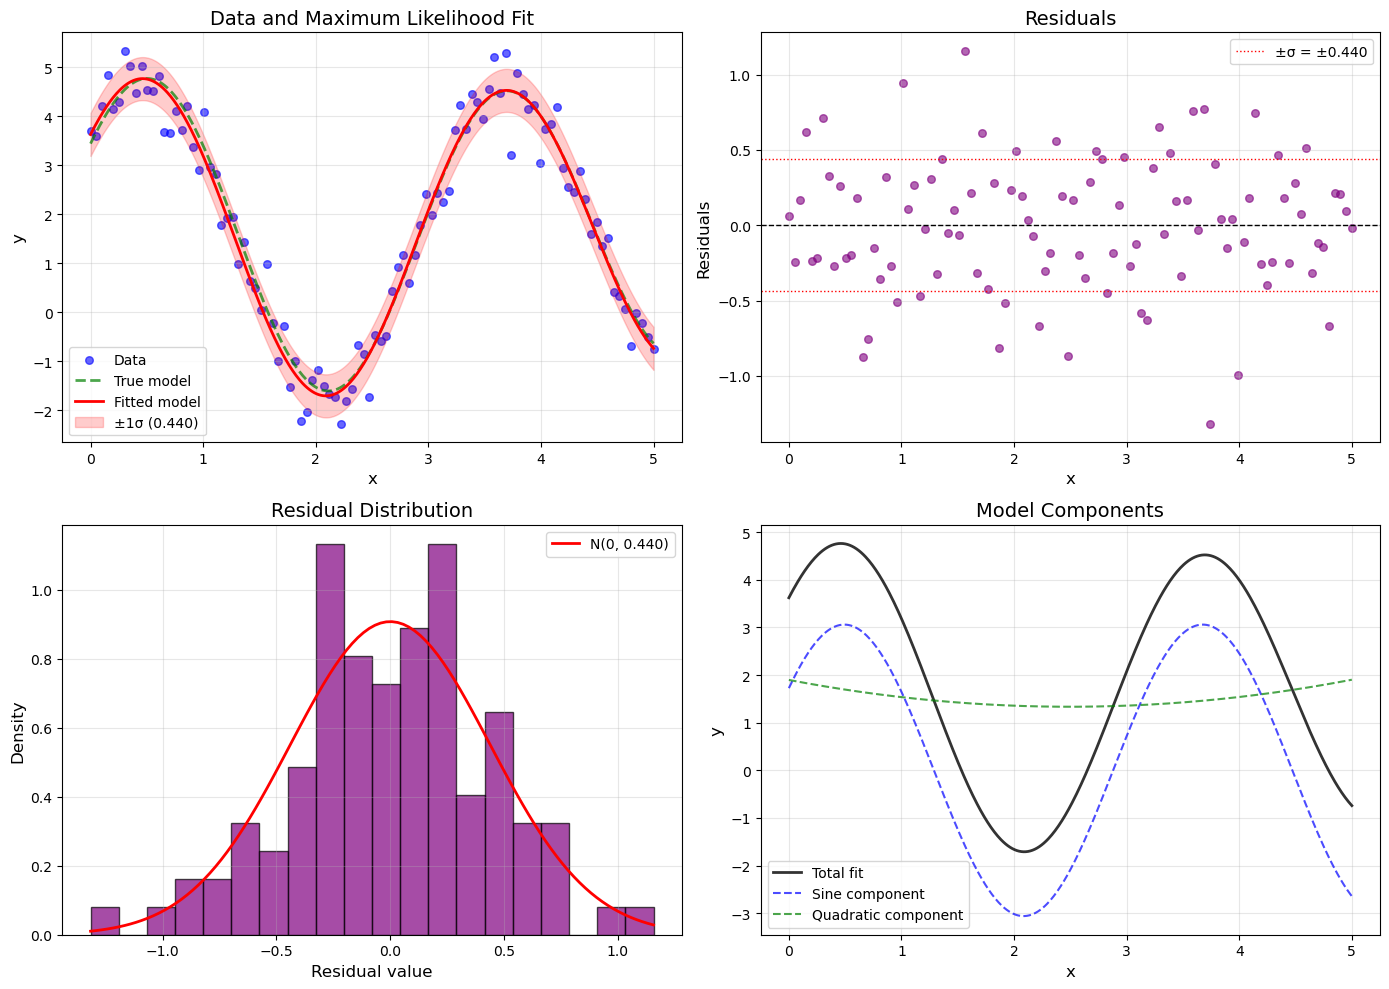

In [24]:
# Generate predictions
x_fine = np.linspace(0, 5, 500)
y_fitted = model(x_fine, fitted_model_params)
y_true_fine = model(x_fine, true_params)

# Calculate residuals
residuals = y_data - model(x_data, fitted_model_params)

# Create visualization
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot 1: Data and fitted model
ax1 = axes[0, 0]
ax1.scatter(x_data, y_data, alpha=0.6, s=30, label='Data', color='blue')
ax1.plot(x_fine, y_true_fine, 'g--', linewidth=2, label='True model', alpha=0.7)
ax1.plot(x_fine, y_fitted, 'r-', linewidth=2, label='Fitted model')
ax1.fill_between(x_fine, y_fitted - fitted_sigma, y_fitted + fitted_sigma, 
                  alpha=0.2, color='red', label=f'±1σ ({fitted_sigma:.3f})')
ax1.set_xlabel('x', fontsize=12)
ax1.set_ylabel('y', fontsize=12)
ax1.set_title('Data and Maximum Likelihood Fit', fontsize=14)
ax1.legend(fontsize=10)
ax1.grid(True, alpha=0.3)

# Plot 2: Residuals
ax2 = axes[0, 1]
ax2.scatter(x_data, residuals, alpha=0.6, s=30, color='purple')
ax2.axhline(y=0, color='black', linestyle='--', linewidth=1)
ax2.axhline(y=fitted_sigma, color='red', linestyle=':', linewidth=1, label=f'±σ = ±{fitted_sigma:.3f}')
ax2.axhline(y=-fitted_sigma, color='red', linestyle=':', linewidth=1)
ax2.set_xlabel('x', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title('Residuals', fontsize=14)
ax2.legend(fontsize=10)
ax2.grid(True, alpha=0.3)

# Plot 3: Histogram of residuals
ax3 = axes[1, 0]
ax3.hist(residuals, bins=20, density=True, alpha=0.7, color='purple', edgecolor='black')
x_norm = np.linspace(residuals.min(), residuals.max(), 100)
ax3.plot(x_norm, norm.pdf(x_norm, 0, fitted_sigma), 'r-', linewidth=2, 
         label=f'N(0, {fitted_sigma:.3f})')
ax3.set_xlabel('Residual value', fontsize=12)
ax3.set_ylabel('Density', fontsize=12)
ax3.set_title('Residual Distribution', fontsize=14)
ax3.legend(fontsize=10)
ax3.grid(True, alpha=0.3)

# Plot 4: Component breakdown
ax4 = axes[1, 1]
sine_component = fitted_params[0] * np.sin(fitted_params[1] * x_fine + fitted_params[2])
quad_component = fitted_params[3] * x_fine**2 + fitted_params[4] * x_fine + fitted_params[5]
ax4.plot(x_fine, y_fitted, 'k-', linewidth=2, label='Total fit', alpha=0.8)
ax4.plot(x_fine, sine_component, 'b--', linewidth=1.5, label='Sine component', alpha=0.7)
ax4.plot(x_fine, quad_component, 'g--', linewidth=1.5, label='Quadratic component', alpha=0.7)
ax4.set_xlabel('x', fontsize=12)
ax4.set_ylabel('y', fontsize=12)
ax4.set_title('Model Components', fontsize=14)
ax4.legend(fontsize=10)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()